In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [70]:
# load dataset
path = 'dataset/'
train = pd.read_csv(path+'train_V2.csv')
test = pd.read_csv(path+'test_V2.csv')
submit = pd.read_csv(path+'sample_submission_V2.csv')

train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [71]:
print('Shape of train set: ', train.shape)
print('Shape of test set: ', test.shape)

Shape of train set:  (4446966, 29)
Shape of test set:  (1934174, 28)


In [72]:
# show submit
submit.head()

,Id,winPlacePerc
0,9329eb41e215eb,1
1,639bd0dcd7bda8,1
2,63d5c8ef8dfe91,1
3,cf5b81422591d1,1
4,ee6a295187ba21,1


In [73]:
# show the train information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [74]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [75]:
# missing value checking
print('================== Check missing data ==================')
print('train set: ', train.isnull().sum())
print('\ntest set: ', test.isnull().sum())

================== Check missing data ==================
train set:  Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

test set:  Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
mat

In [76]:
print(train[train['winPlacePerc'].isnull()])

# here we drop this Nan row
train = train.dropna(axis=0)
print('train shape: ', train.shape)

                     Id         groupId         matchId  assists  boosts  \
2744604  f70c74418bb064  12dfbede33f92b  224a123c53e008        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace      ...       \
2744604          0.0      0              0      0          1      ...        

         revives  rideDistance  roadKills  swimDistance  teamKills  \
2744604        0           0.0          0           0.0          0   

        vehicleDestroys  walkDistance  weaponsAcquired  winPoints  \
2744604               0           0.0                0          0   

         winPlacePerc  
2744604           NaN  

[1 rows x 29 columns]
train shape:  (4446965, 29)


In [77]:
print('# row data: ', train.shape[0])
print('# id: ', len(train.Id.unique()))
print('# groupId: ', len(train.groupId.unique()))
print('# matchId : ', len(train.matchId.unique()))

# row data:  4446965
# id:  4446965
# groupId:  2026744
# matchId :  47964


# Pre-processing & Explore Data Analysis

In [78]:
# before pre-processing train and test set together
# we observer the correlation between X and target y first

corr = train.corr()
corr = corr['winPlacePerc'].sort_values(ascending=False)

high_corr = corr
print('============== Top 10 positive features ==============')
print(corr.iloc[:10])

print('\n============== Top 10 negative features ==============')
print(corr.iloc[-10:])

# as you can see below
# walkDistance, boosts, weaponsAcquired > 50% correlation with winPlacePerc
# more walkDistance mean playes survive more on games maybe
# more boosts items let player survive more, because the boost items let player's more power or fast, which maybe cause survive more
# more weaponsAcquired let players survival

# killPlace most negative relation with winPlacePerc
# the bigger killPlace than the ranking the more last, which mean kill less enermy playes 

============== Top 10 positive features ==============
winPlacePerc       1.000000
walkDistance       0.810888
boosts             0.634234
weaponsAcquired    0.583806
damageDealt        0.440507
heals              0.427857
kills              0.419916
longestKill        0.410154
killStreaks        0.377566
rideDistance       0.342915
Name: winPlacePerc, dtype: float64

============== Top 10 negative features ==============
vehicleDestroys    0.073436
numGroups          0.039621
maxPlace           0.037377
roadKills          0.034544
teamKills          0.015943
rankPoints         0.013523
killPoints         0.012908
winPoints          0.007061
matchDuration     -0.005171
killPlace         -0.719069
Name: winPlacePerc, dtype: float64


In [79]:
### Combining train and test and pre-processing 
# combining train and test set
# train_test = pd.concat([train, test], sort=False)
# print('Shape of combining dataset:', train_test.shape)
# train_test.head()

# after combining the train and test, it will cause Nan, bcz test set does not contain target 'winPlacePerc'

## Preprocess - Categorical features

In [80]:
# find #categorical features
cat_feats = [var for var in train.columns if train[var].dtype == 'O']
print('# categorical features ', len(cat_feats))

num_feats = [var for var in train.columns if train[var].dtype != 'O']
print('# numerical features ', len(num_feats))

# show the categorical features
print('\n============= categorical features =============\n', cat_feats)

# as the result below, there are 3 features about ID, so the matchType is meaningful than others

# ============ pre-processing the categoricals features ============
# Here I will remove the id features, encoding the matchType features later

# categorical features  4
# numerical features  25

============= categorical features =============
 ['Id', 'groupId', 'matchId', 'matchType']


In [81]:
train['matchType'].value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536761
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

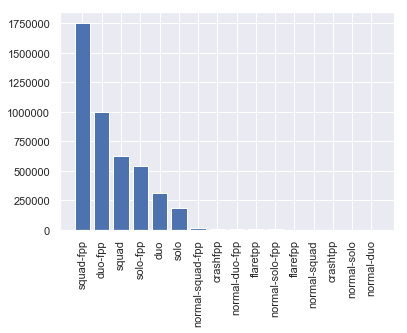

In [82]:
plt.bar(train['matchType'].value_counts().index, train['matchType'].value_counts().values)
plt.xticks(rotation=90)
plt.show()

In [83]:
# first engineering function adding new features and convert less count features
# ========= before convert the fews counts features =========
# let's create new feature name 'IS_FPP'(1 = FPP(第一人稱視角), 0 = TPP(可第三人稱視角))
# convert the less count features to most one
# as figure above, features squad-fpp, duo-fpp, squad, solo-fpp, duo, solo are most
# I will convert others into most
# normal-squad-fpp, squad-fpp, normal-squad to squad
# normal-duo-fpp, duo-fpp, normal-duo to duo
# normal-solo-fpp,solo-fpp, normal-solo to solo
# crashfpp, flaretpp, flarefpp, crashtpp and crashtpp to others


def cat_process(data):
    fpp_feats = set([var for var in data['matchType'] if 'fpp' in var]) # get the value which contain fpp
    data['IS_FPP'] = data['matchType'].apply(lambda var: 1 if var in fpp_feats else 0) # if substring contain fpp return 1 else 0
    
    # here will convert all string contain squad, duo and solo to squad, duo and solo (ex:  normal-squad-fpp -> squad)
    typ_ls = ['squad', 'duo', 'solo']
    for tpy in typ_ls:
        data['matchType'] = data['matchType'].apply(lambda var: tpy if tpy in var else var)
    
    # convert string not contain squad, duo and solo to other
    data['matchType'] = data['matchType'].apply(lambda var: 'other' if var not in typ_ls else var)
    

In [84]:
# call cat_process method to pre-process categorical features
cat_process(train)
cat_process(test)
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,IS_FPP
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,1
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,1
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,1


In [85]:
train['matchType'].value_counts()

squad    2400402
duo      1315970
solo      720712
other       9881
Name: matchType, dtype: int64

In [86]:
test['matchType'].value_counts()

squad    1032314
duo       584286
solo      313924
other       3650
Name: matchType, dtype: int64

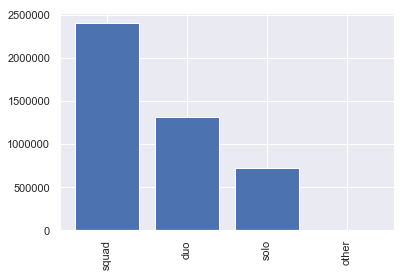

In [87]:
plt.bar(train['matchType'].value_counts().index, train['matchType'].value_counts().values)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'winPlace with different matchType')

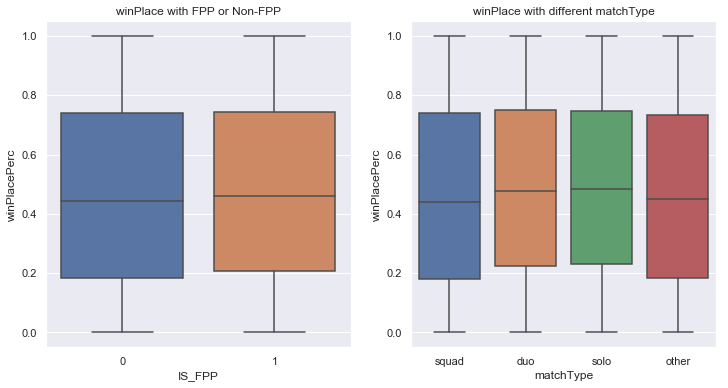

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x='IS_FPP', y='winPlacePerc', data=train, ax=axs[0])
axs[0].set_title('winPlace with FPP or Non-FPP')

sns.boxplot(x='matchType', y='winPlacePerc', data=train, ax=axs[1])
axs[1].set_title('winPlace with different matchType')

# different matchType and IS_FPP does not have high influence with target

Text(0.5, 1.0, 'damageDealt with FPP or Non-FPP')

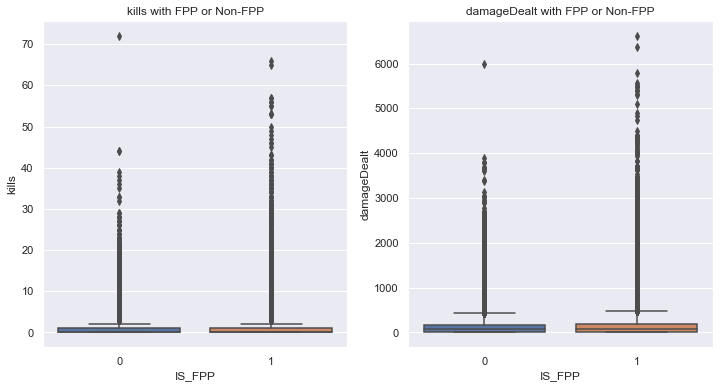

In [89]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x='IS_FPP', y='kills', data=train, ax=axs[0])
axs[0].set_title('kills with FPP or Non-FPP')

sns.boxplot(x='IS_FPP', y='damageDealt', data=train, ax=axs[1])
axs[1].set_title('damageDealt with FPP or Non-FPP')

# different matchType and IS_FPP does not have high influence with target

## Preprocessing - Numerical features

In [90]:
# show the continuous feaures
continuous_feats = [var for var in num_feats if train[var].dtypes == 'float']
continuous_feats
        
# as the result below, there 6 continuous features
# there are very make sense, like distance

['damageDealt',
 'longestKill',
 'rideDistance',
 'swimDistance',
 'walkDistance',
 'winPlacePerc']

### Outlier Detection

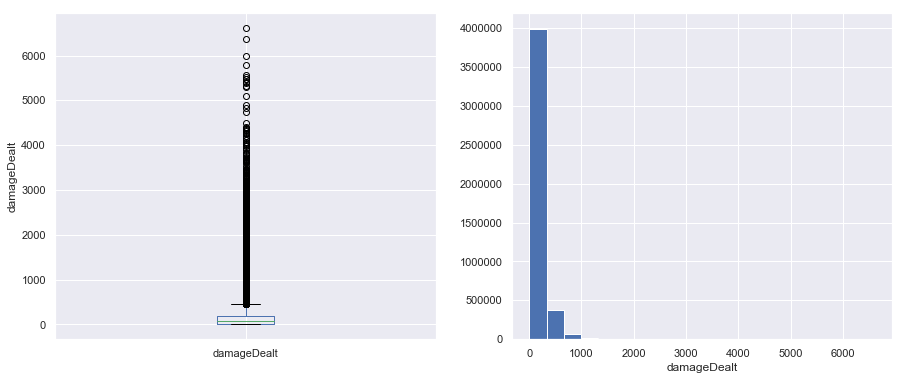

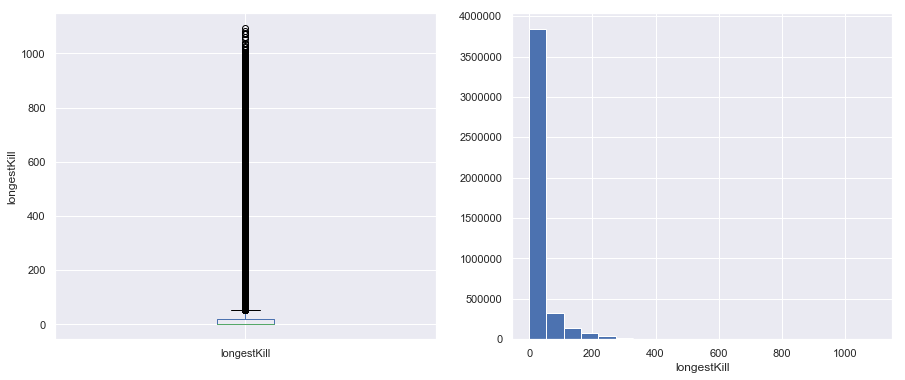

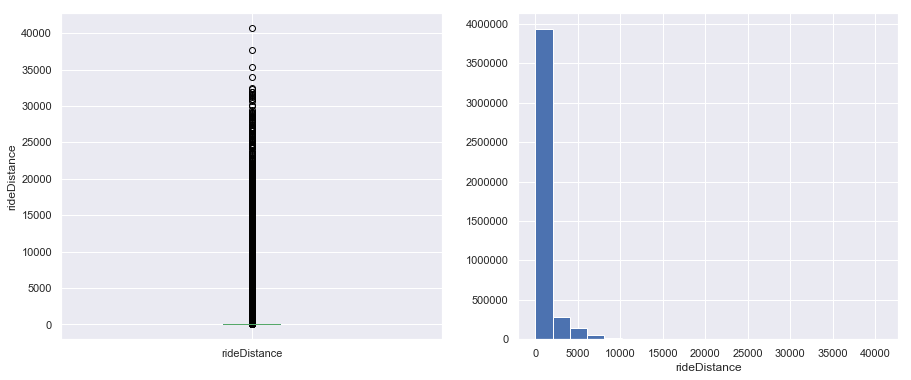

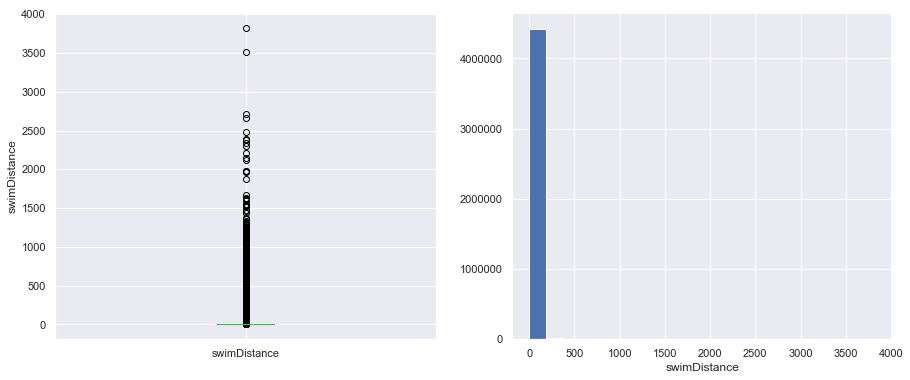

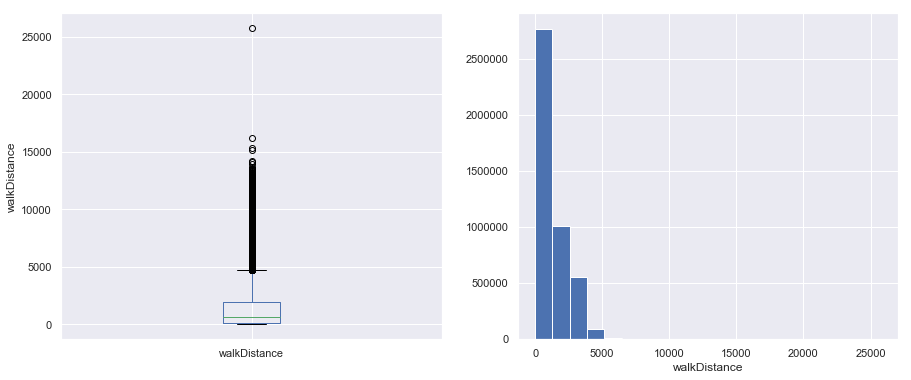

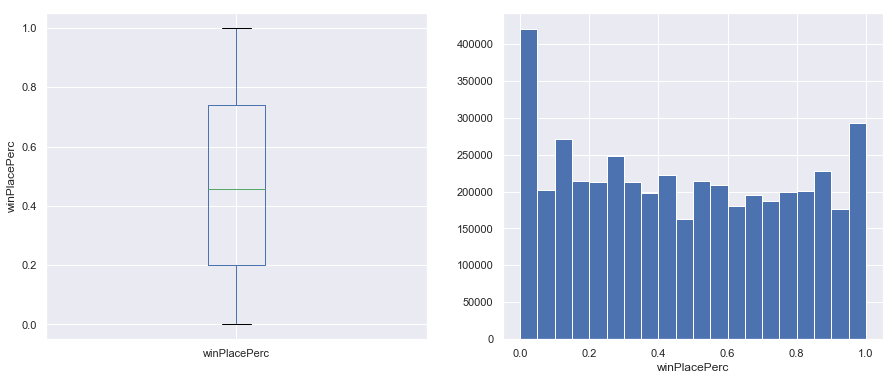

In [91]:
# let's checking whether the continuous value have outlier first
for var in continuous_feats:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = train.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = train[var].hist(bins=20)
    fig.set_xlabel(var)

    plt.show()

In [92]:
IQR = train.damageDealt.quantile(0.75) - train.damageDealt.quantile(0.25)
upbond = train.damageDealt.quantile(0.75) + 3 * IQR
lowbond = train.damageDealt.quantile(0.25) - 3 * IQR
print(upbond, IQR, lowbond)

# for var in 

744.0 186.0 -558.0


In [93]:
# quantization by tree
# in order to find the optimal buckets automatically, I would use decision trees to find the buckets for me.

# df = pd.cut(train.damageDealt, 20)
# ===============================================================================
# 對連續型特徵進行離散化
# 畫barplot觀察

# ===============================================================================
# 之後處理離散型特徵

## Runner (walkingDistance)

In [94]:
print('The average person walks for {:.1f}m, \n99% of people have walked {}m or less, \nwhile the marathoner champion walked for {}m'.format(train['walkDistance'].mean(), train['walkDistance'].quantile(0.99), train['walkDistance'].max()))

The average person walks for 1154.2m, 
99% of people have walked 4396.0m or less, 
while the marathoner champion walked for 25780.0m


In [95]:
train[train['walkDistance'] == train['walkDistance'].max()]['winPlacePerc']

# the marathoner have high winning rate

497965    0.9894
Name: winPlacePerc, dtype: float64

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


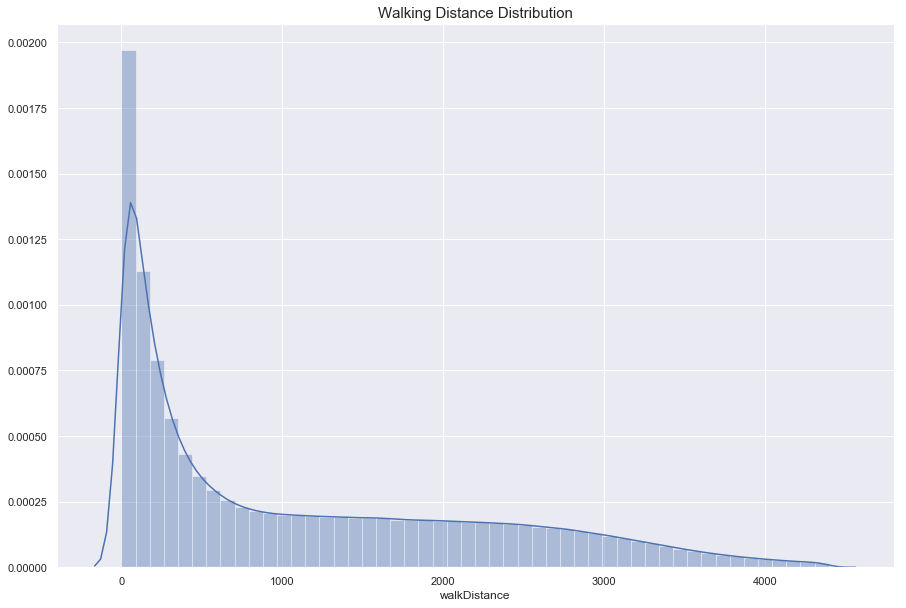

In [96]:
# walking distance distribution
data = train.copy()
data = data[data['walkDistance'] < train['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

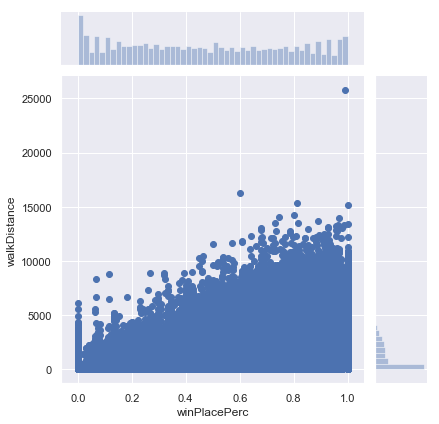

In [97]:
sns.jointplot(x='winPlacePerc', y='walkDistance', data=train)
plt.show()
# walking has high correlation with winPlacePerc

## boost ingand healing

In [98]:
print("The average person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}.".format(train['heals'].mean(), train['heals'].quantile(0.99), train['heals'].max()))
print("The average person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(train['boosts'].mean(), train['boosts'].quantile(0.99), train['boosts'].max()))

The average person uses 1.4 heal items, 99% of people use 12.0 or less, while the doctor used 80.
The average person uses 1.1 boost items, 99% of people use 7.0 or less, while the doctor used 33.


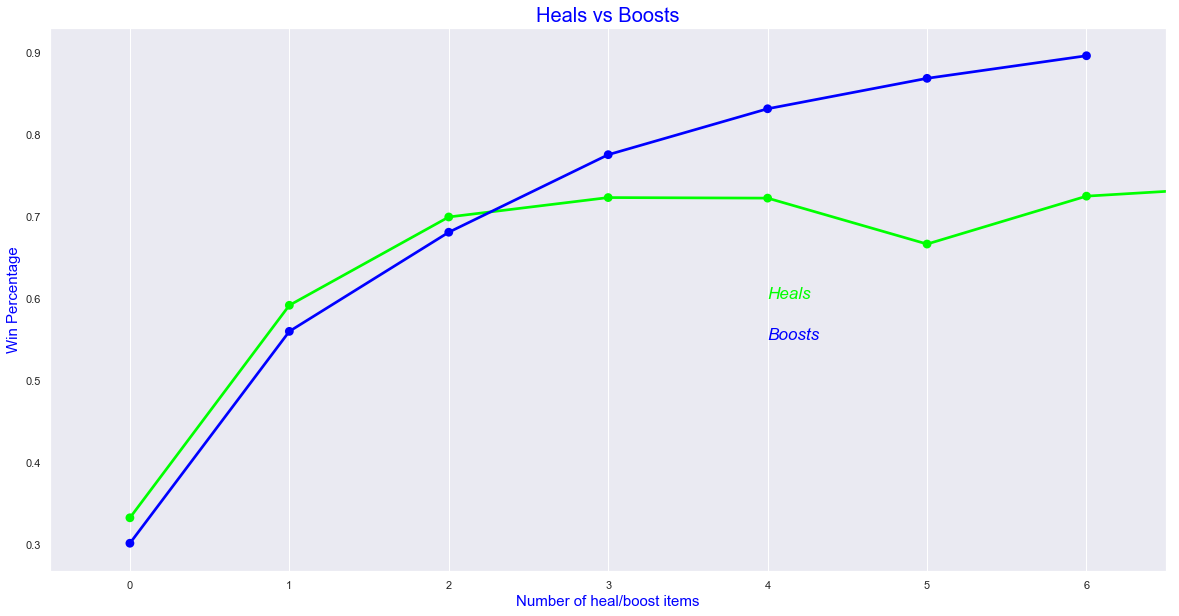

In [99]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

## kills

In [100]:
print("The average person kills {:.4f} players, 99% of people have {} kills or less, while the most kills ever recorded is {}.".format(train['kills'].mean(),train['kills'].quantile(0.99), train['kills'].max()))

The average person kills 0.9248 players, 99% of people have 7.0 kills or less, while the most kills ever recorded is 72.


Text(0.5, 1.0, 'Kill counts')

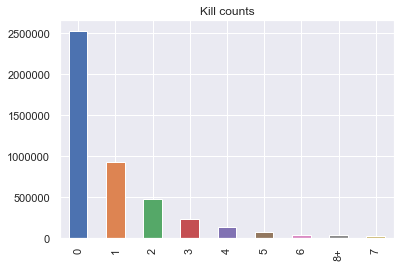

In [101]:
# plot the kill counts
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
data['kills'].value_counts().plot.bar()
plt.title('Kill counts')

# most people cannot make single kill.
# least observe do they do damage?

Text(0.5, 1.0, 'Damage Dealt by 0 killers')

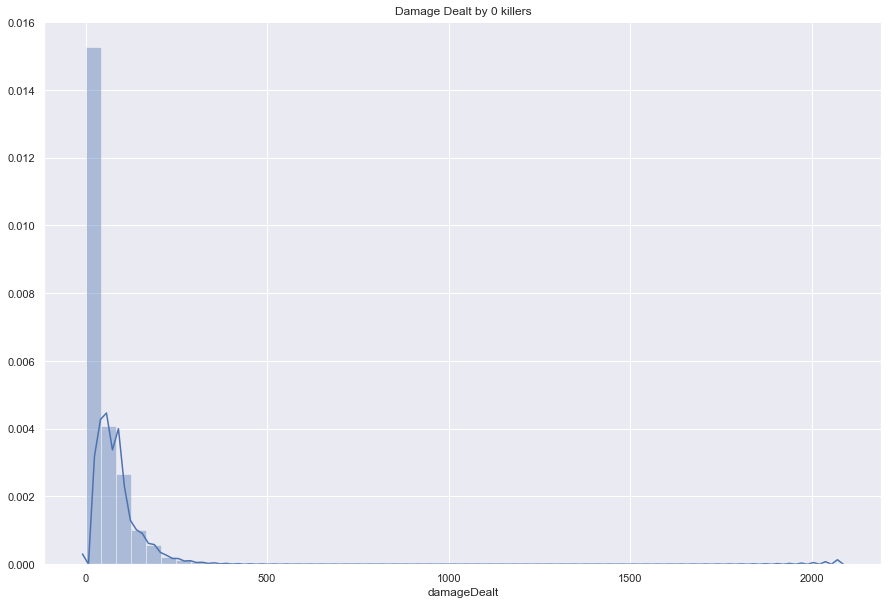

In [102]:
# let's observe do they do damage?
data = train.copy()
data = data[data['kills'] == 0]
plt.figure(figsize=(15,10))
sns.distplot(data['damageDealt'])
plt.title('Damage Dealt by 0 killers')

In [103]:
print('{} players ({:.4f}%) have won without a single kill!'.format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(train)))

data1 = train[train['damageDealt'] == 0].copy()
print('{} players ({:.4f}%) have won without dealing damage!'.format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(train)))

16666 players (0.3748%) have won without a single kill!
4770 players (0.1073%) have won without dealing damage!


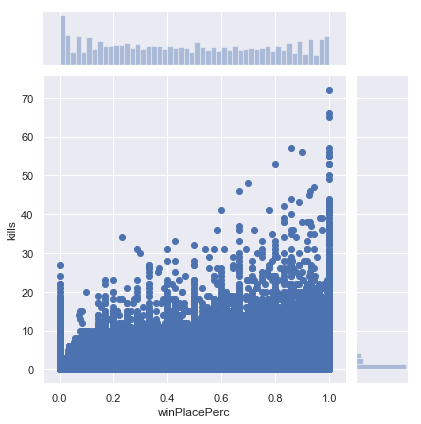

In [104]:
# plot the winPlacePerc vs kills
sns.jointplot(train.winPlacePerc, train.kills)
plt.show()

# as you can see the winPlacePerc have correlation with kills

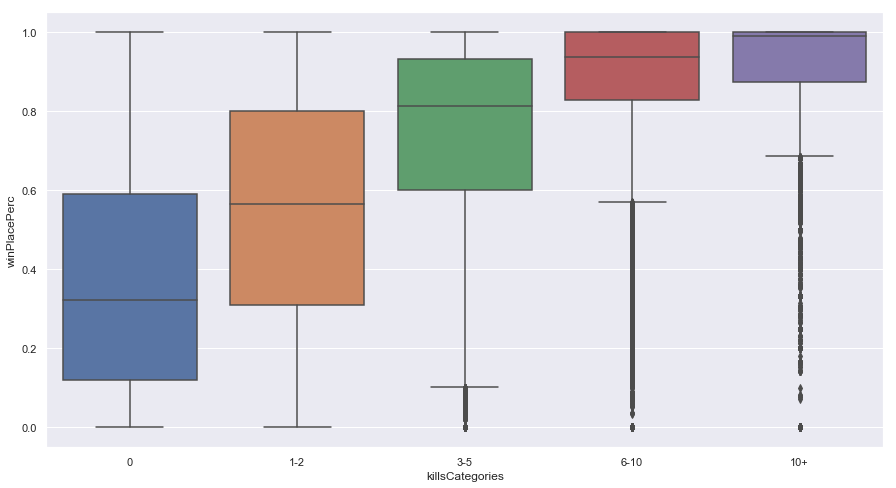

In [105]:
# let's group players based on kills (0 kills, 1-2 kills, 3-5 kills, 6-10 kills and 10+ kills).
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0', '1-2', '3-5', '6-10', '10+'])

plt.figure(figsize=(15,8))
sns.boxplot(x='killsCategories', y='winPlacePerc', data=kills)
plt.show()


# =============================================================
# build the method to do the function as above for build the pipeline
def kill_cat(data):
    data['killsCategories'] = pd.cut(data['kills'], [-1, 0, 2, 5, 10, 60], labels=['0', '1-2', '3-5', '6-10', '10+'])

### Solos, Duos and Squads

In [106]:
# here are 3 game modes in the game. One can play solo, or with a friend (duo), or with 3 other friends (squad). 100 players join the same server, 
# so in the case of duos the max teams are 50 and in the case of squads the max teams are 25.

solos = train[train['numGroups']>50]
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)]
squads = train[train['numGroups']<=25]
print("There are {} ({:.2f}%) solo games, {} ({:.2f}%) duo games and {} ({:.2f}%) squad games.".format(len(solos), 100*len(solos)/len(train), len(duos), 100*len(duos)/len(train), len(squads), 100*len(squads)/len(train),))

There are 709111 (15.95%) solo games, 3295326 (74.10%) duo games and 442528 (9.95%) squad games.


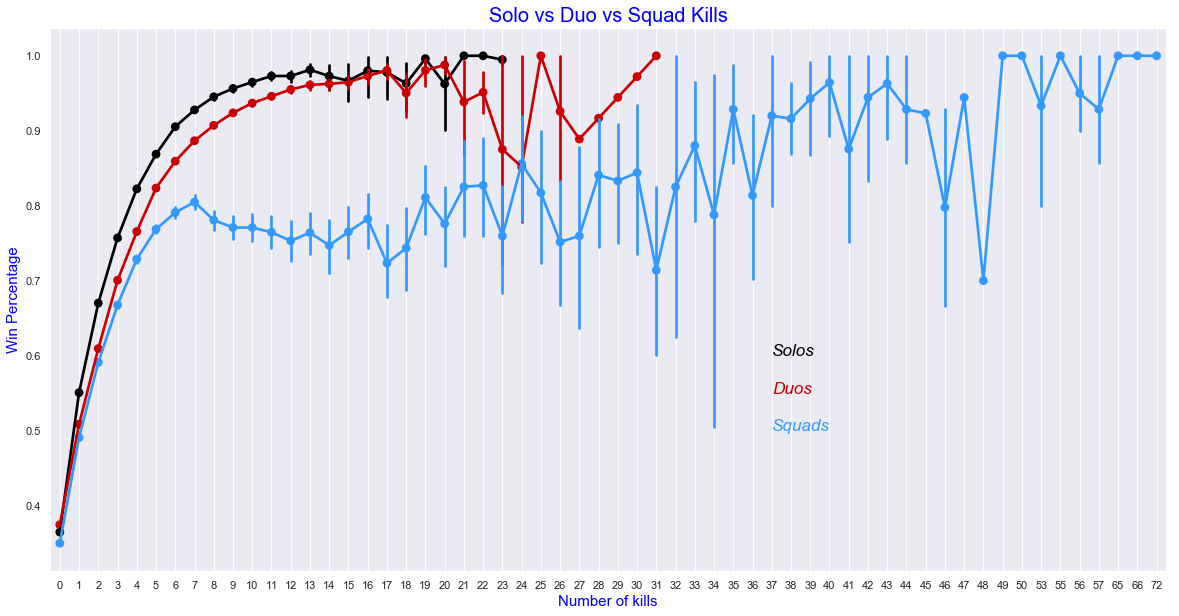

In [107]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)

plt.text(37,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

# Solos and duos behave the same, but when playing squads kills don't matter that much.

In [108]:
# get dicrete features
discrete_feats = [var for var in num_feats if var not in continuous_feats]

# outlies in discrete variables
# for var in discrete_feats:
#     print(train[var].value_counts()/np.float(len(train)))
#     print()

## Add new features

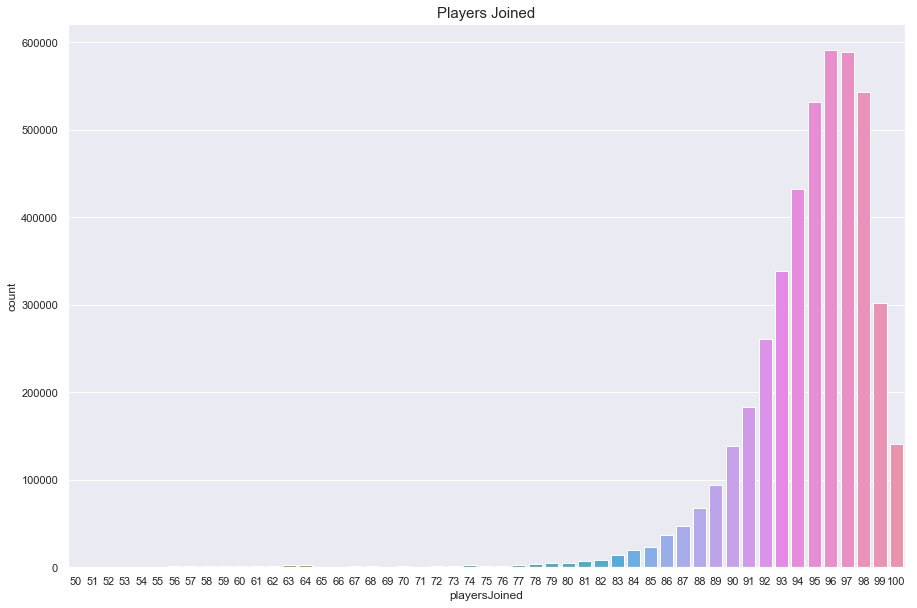

In [109]:
# There is no variable that gives us the number of players joined. So lets create one.
train['playersJoined'] = train.groupby('matchId')['matchId'].transform('count')
test['playersJoined'] = test.groupby('matchId')['matchId'].transform('count')

data = train.copy()
data = data[data['playersJoined']>49] # number of joined < 49 is quite few, so we just showing #joined > 49
plt.figure(figsize=(15, 10))
sns.countplot(data['playersJoined'])
plt.title('Players Joined', fontsize=15)
# plt.xticks(rotation=90)
plt.show()

In [110]:
# base on playersJoined feature, creating other new features whcih have been normalize by playersJoined
train['killsNorm'] = train['kills'] * ((100 - train['playersJoined'])/100 + 1)
train['damageDealtNorm'] = train['damageDealt'] * ((100 - train['playersJoined'])/100 + 1)

test['killsNorm'] = test['kills'] * ((100 - test['playersJoined'])/100 + 1)
test['damageDealtNorm'] = test['damageDealt'] * ((100 - test['playersJoined'])/100 + 1)

# show the features
train[['playersJoined', 'kills', 'killsNorm', 'damageDealt', 'damageDealtNorm']].loc[10:15]

,playersJoined,kills,killsNorm,damageDealt,damageDealtNorm
10,99,0,0.00,28.38,28.6638
11,95,0,0.00,137.90,144.7950
12,90,0,0.00,0.00,0.0000
13,97,4,4.12,324.20,333.9260
14,93,1,1.07,122.80,131.3960
15,95,0,0.00,80.71,84.7455


In [111]:
# let's create some new features
# heals and boosts combining
train['healsAndBoosts'] = train['heals'] + train['boosts']
test['healsAndBoosts'] = test['heals'] + test['boosts']


# head shot rate (headshotKills / kills)
train['headshotRate'] = train['headshotKills'] / train['kills']
train['headshotRate'].fillna(0, inplace=True)

test['headshotRate'] = test['headshotKills'] / test['kills']
test['headshotRate'].fillna(0, inplace=True)


# total distance (rideDistance + swimDistance + walkDistance )
train['totalDistance'] = train['rideDistance'] + train['swimDistance'] + train['walkDistance']
test['totalDistance'] = test['rideDistance'] + test['swimDistance'] + test['walkDistance']


# when using boosting items you run faster which also help stay out of the zone
# new features boost per walk
train['boostsPerWalkDistance'] = train['boosts'] / (train['walkDistance'] + 1)  #The +1 is to avoid infinity
train['healsPerWalkDistance'] = train['heals'] / (train['walkDistance'] + 1) #The +1 is to avoid infinity
train['healsAndBoostsPerWalkDistance'] = train['healsAndBoosts'] / (train['walkDistance'] + 1) #The +1 is to avoid infinity
train['killsPerWalkDistance'] = train['kills']/(train['walkDistance']+1) #The +1 is to avoid infinity
train['killsPerWalkDistance'].fillna(0, inplace=True)

test['boostsPerWalkDistance'] = test['boosts'] / (test['walkDistance'] + 1)  #The +1 is to avoid infinity
test['healsPerWalkDistance'] = test['heals'] / (test['walkDistance'] + 1) #The +1 is to avoid infinity
test['healsAndBoostsPerWalkDistance'] = test['healsAndBoosts'] / (test['walkDistance'] + 1) #The +1 is to avoid infinity
test['killsPerWalkDistance'] = test['kills']/(test['walkDistance']+1) #The +1 is to avoid infinity
test['killsPerWalkDistance'].fillna(0, inplace=True)


# new feature which record the team
train['team'] = [1 if var > 50 else 2 if (var>25 & var<50) else 4 for var in train['numGroups']]
test['team'] = [1 if var > 50 else 2 if (var>25 & var<50) else 4 for var in test['numGroups']]

# showing the new features
train[['healsAndBoosts', 'headshotRate', 'totalDistance', 
       'boostsPerWalkDistance', 'healsPerWalkDistance', 'healsAndBoostsPerWalkDistance', 'killsPerWalkDistance', 'team']].tail()

,healsAndBoosts,headshotRate,totalDistance,boostsPerWalkDistance,healsPerWalkDistance,healsAndBoostsPerWalkDistance,killsPerWalkDistance,team
4446961,0,0.0,2311.000,0.000000,0.000000,0.000000,0.000000,2
4446962,1,0.0,81.700,0.012092,0.000000,0.012092,0.000000,1
4446963,0,0.0,790.884,0.000000,0.000000,0.000000,0.000000,2
4446964,6,0.5,2748.000,0.001455,0.000728,0.002183,0.000728,4
4446965,3,0.0,2613.000,0.001606,0.000803,0.002410,0.001606,1


In [112]:
# showing the new features
train[['kills', 'killsPerWalkDistance', 'winPlacePerc']].tail()

,kills,killsPerWalkDistance,winPlacePerc
4446961,0,0.000000,0.1786
4446962,0,0.000000,0.2935
4446963,0,0.000000,0.4815
4446964,2,0.000728,0.8000
4446965,2,0.001606,0.5464


In [113]:
# let's checking whether the new features have missing value
train[['boostsPerWalkDistance', 'healsPerWalkDistance', 'healsAndBoostsPerWalkDistance', 'killsPerWalkDistance', 'team']].isnull().mean()

# the result below showing, there are no missing values

boostsPerWalkDistance            0.0
healsPerWalkDistance             0.0
healsAndBoostsPerWalkDistance    0.0
killsPerWalkDistance             0.0
team                             0.0
dtype: float64

In [114]:
# check the data whether has 0 walking, swimming or riding but many kills
train[(train['kills']>0)&(train['totalDistance']==0)][['kills', 'totalDistance', 'winPlacePerc']].sort_values(by='kills', ascending=False)

# 0 total distance but many kills this is quite weird.
# maybe the player which is cheater.

,kills,totalDistance,winPlacePerc
1702541,43,0.0,1.0000
1068513,38,0.0,0.8333
3062788,36,0.0,0.8667
1158891,36,0.0,0.5833
2998470,35,0.0,1.0000
2394021,31,0.0,0.5385
3057746,31,0.0,0.7500
422093,30,0.0,1.0000
3083358,30,0.0,0.7500
4115816,29,0.0,0.7500


In [115]:
# checking the new features headshotRate
train[(train['headshotRate'] == 1)][['headshotRate', 'kills', 'headshotKills']].sort_values(by='kills', ascending=False)

# the result below, player 1753322 kill 15 guys and each on be headshot
# every kill are headshot, maybe have cheat
# but the condiction still happened, so we do not consider to engineering for feature 'headshotRate' temporary

,headshotRate,kills,headshotKills
1753322,1.0,15,15
2825200,1.0,15,15
2256755,1.0,14,14
2375749,1.0,14,14
871244,1.0,13,13
1483199,1.0,13,13
1348164,1.0,12,12
4428741,1.0,12,12
1380385,1.0,11,11
346124,1.0,11,11


### Splitting train into training and testing set

In [117]:
# the 'Id', 'groupId', 'matchId' will not be fit into ML model
X = train.drop(columns=['Id', 'groupId', 'matchId', 'winPlacePerc'], axis=1)
y = train['winPlacePerc']
test = test.drop(columns=['groupId', 'matchId'], axis=1)

# before spilt data into train and test set
# we need to convert the categorical data by one-hot encoding
X = pd.get_dummies(X, columns=['matchType'], drop_first=True)
# one-hot encoding on test set
test = pd.get_dummies(test, columns=['matchType'], drop_first=True)

# splitting train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('# train set: {}'.format(X_train.shape[0]))
print('# test set: {}'.format(X_test.shape[0]))

# train set: 3557572
# test set: 889393


In [121]:
X_train[['matchType_other', 'matchType_solo', 'matchType_squad']].isnull().mean()

matchType_other    0.0
matchType_solo     0.0
matchType_squad    0.0
dtype: float64

### build the ML model and Predict

In [137]:
from sklearn.preprocessing import StandardScaler # normalization model
from sklearn.linear_model import LinearRegression #import linear model
import xgboost as xgb
from sklearn.metrics import mean_absolute_error # performance evalution metric

In [123]:
scaler = StandardScaler()

# normlizing the train and test set
X_train_cat_col = X_train[['matchType_other', 'matchType_solo', 'matchType_squad']]
X_train_cat_col.reset_index(drop=True, inplace=True)
X_train_sc = scaler.fit_transform(X_train.drop(columns=['matchType_other', 'matchType_solo', 'matchType_squad'], axis=1))
X_train_sc = pd.DataFrame(data=X_train_sc, columns=X_train.drop(columns=['matchType_other', 'matchType_solo', 'matchType_squad'], axis=1).columns) # convert np array into dataframe which will easily to access
# concating 2 df scaled and categorical feautres
X_train_sc = pd.concat([X_train_sc, X_train_cat_col], axis=1)


X_test_cat_col = X_test[['matchType_other', 'matchType_solo', 'matchType_squad']]
X_test_cat_col.reset_index(drop=True, inplace=True)
X_test_sc = scaler.transform(X_test.drop(columns=['matchType_other', 'matchType_solo', 'matchType_squad'], axis=1))
X_test_sc = pd.DataFrame(data=X_test_sc, columns=X_test.drop(columns=['matchType_other', 'matchType_solo', 'matchType_squad'], axis=1).columns) # convert np array into dataframe which will easily to access
# concating 2 df sced and categorical feautres
X_test_sc = pd.concat([X_test_sc, X_test_cat_col], axis=1)


test_cat_col = test[['matchType_other', 'matchType_solo', 'matchType_squad']]
test_cat_col.reset_index(drop=True, inplace=True)
test_sc = scaler.transform(test.drop(columns=['Id', 'matchType_other', 'matchType_solo', 'matchType_squad'], axis=1))
test_sc = pd.DataFrame(data=test_sc, columns=test.drop(columns=['Id', 'matchType_other', 'matchType_solo', 'matchType_squad'], axis=1).columns) # convert np array into dataframe which will easily to access
# concating 2 df sced and categorical feautres
test_sc = pd.concat([test_sc, test_cat_col], axis=1)

# showing the converted result
X_train_sc.head()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,headshotRate,totalDistance,boostsPerWalkDistance,healsPerWalkDistance,healsAndBoostsPerWalkDistance,killsPerWalkDistance,team,matchType_other,matchType_solo,matchType_squad
0,-0.397338,-0.062199,0.554956,-0.573686,-0.376480,0.608065,0.378925,-0.804902,-0.592861,-0.765118,...,-0.396085,0.834821,-0.019327,-0.008178,-0.012951,-0.026336,-0.001894,0,0,0
1,-0.397338,-0.645169,-0.017457,0.297971,1.282136,3.220291,-0.931808,-0.804902,0.047937,0.641351,...,3.442372,1.260523,-0.036714,0.025048,0.009937,-0.023507,-0.001894,0,0,1
2,2.999646,1.103741,0.081356,-0.573686,-0.376480,-0.138286,-0.458488,-0.804902,-0.592861,-0.765118,...,-0.396085,1.620697,-0.006145,-0.023466,-0.021876,-0.026336,-0.001894,0,0,1
3,1.301154,0.520771,1.065976,1.169627,2.940752,-0.511461,-1.259491,1.347822,0.688735,0.641351,...,3.442372,1.812698,0.012413,-0.027177,-0.019282,-0.016643,-0.001894,0,0,0
4,-0.397338,-0.645169,-0.764692,-0.573686,-0.376480,-0.138286,1.325565,1.264963,-0.592861,-0.765118,...,-0.396085,-0.762409,-0.036714,0.094972,0.069446,-0.026336,-0.001894,0,0,1


In [127]:
# build the Linear model
lin_reg = LinearRegression()

# fit the training set to linear model
lin_reg.fit(X_train_sc, y_train)

# make predict
y_pred_lin = lin_reg.predict(X_test_sc)

# evaluating performance by MSE
mse_score = mean_absolute_error(y_test, y_pred_lin)

#cross validation to see over all performance of model
# cross_score = cross_val_score(lin_reg, X_train_sc, y_train, cv=10, scoring='neg_mean_absolute_error')


print('MSE: {}'.format(mse_score))
# print('Over all performance: {}'.format(cross_score))

MSE: 0.08770925259210743


### Submission to Kaggle

In [134]:
# y_pred = lin_reg.predict(test.drop(columns='Id', axis=1))
y_pred = lin_reg.predict(test_sc)
# convered ndarray to series
y_pred = pd.Series(y_pred)

temp = pd.concat([test.Id, y_pred], axis=1)
temp.columns = ['Id', 'SalePrice']
temp.head()

,Id,SalePrice
0,9329eb41e215eb,0.180539
1,639bd0dcd7bda8,0.943096
2,63d5c8ef8dfe91,0.467310
3,cf5b81422591d1,0.511240
4,ee6a295187ba21,0.968808


In [136]:
# export to csv files
temp.to_csv('dataset/submission.csv', index=False)